In [27]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib ipympl

#%matplotlib inline

In [28]:
#df = pd.read_csv('/home/walter/Work/data/2022-02-06-dataDCcycle.csv')
df = pd.read_csv('data/2023-07-12-dataNanoUPS-DCCycle.csv')  # read from data dir in checkout dir
df
df.Time

0       2023-7-10T22:44:13
1       2023-7-10T22:45:13
2       2023-7-10T22:46:14
3       2023-7-10T22:47:14
4       2023-7-10T22:48:14
               ...        
2484    2023-7-12T17:07:02
2485    2023-7-12T17:08:02
2486    2023-7-12T17:09:02
2487    2023-7-12T17:10:03
2488    2023-7-12T17:11:03
Name: Time, Length: 2489, dtype: object

In [29]:
print(df.head())

                 Time   A0  A0volt  A0tempF   A1  A1volt  A1tempF   A2  \
0  2023-7-10T22:44:13  154    0.75    77.48  509    2.48    389.8  509   
1  2023-7-10T22:45:13  153    0.75    76.60  509    2.48    389.8  509   
2  2023-7-10T22:46:14  153    0.75    76.60  509    2.48    389.8  509   
3  2023-7-10T22:47:14  153    0.75    76.60  509    2.48    389.8  472   
4  2023-7-10T22:48:14  153    0.75    76.60  509    2.48    389.8  471   

   A2volt  A2tempF  ...  D5  D6  D7  D8  D9  D10  D11  D12  D13  SerialNumber  
0    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
1    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
2    2.48   389.80  ...   1   0   1   1   1    1    1    1    1           NaN  
3    2.30   357.25  ...   1   0   1   1   1    1    1    1    1           NaN  
4    2.30   356.37  ...   1   0   1   1   1    1    1    1    1           NaN  

[5 rows x 34 columns]


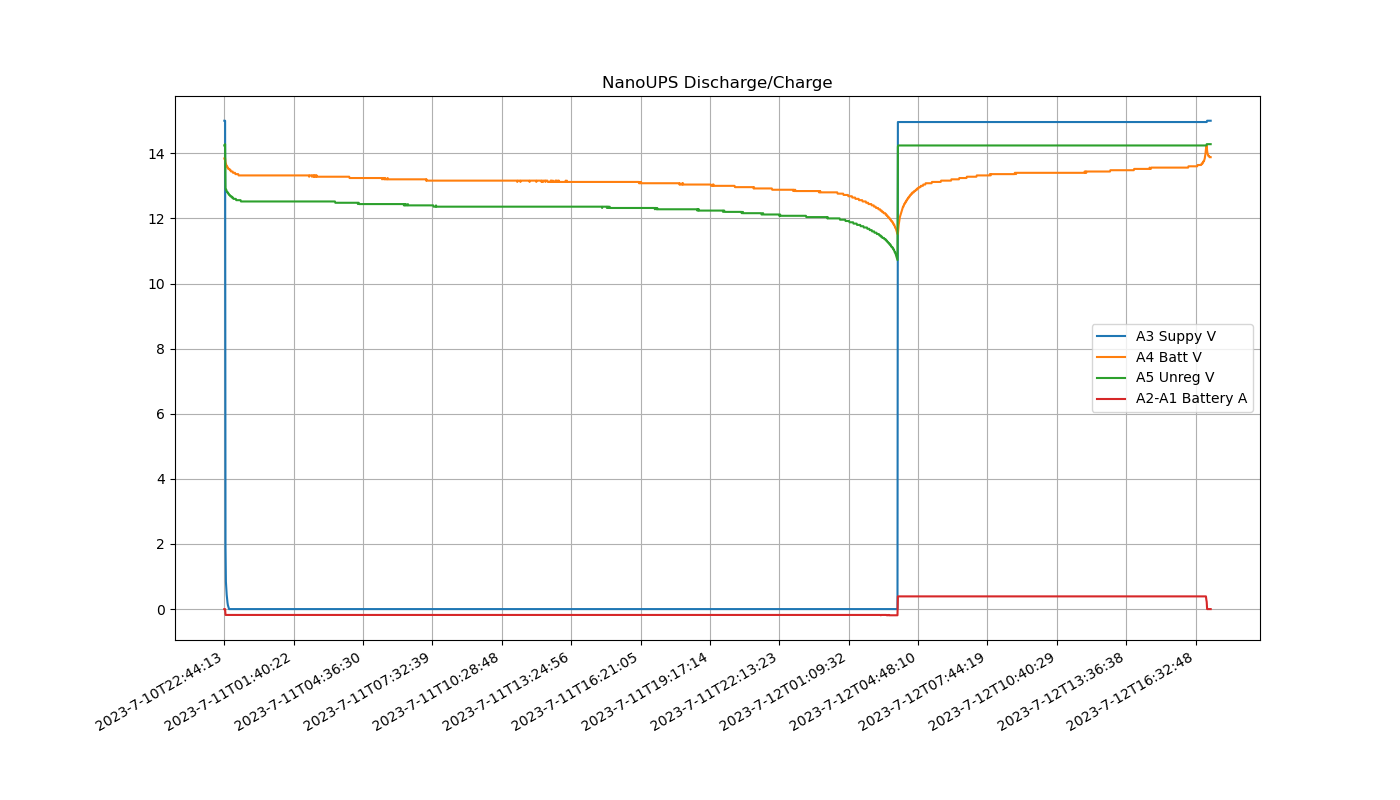

In [30]:
#plt.plot(df.Time, df.A3volt)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Suppy V')
ax.plot(df.Time, df.A4volt, label='A4 Batt V')
ax.plot(df.Time, df.A5volt, label='A5 Unreg V')
ax.plot(df.Time, df.A2volt - df.A1volt, label='A2-A1 Battery A') # A1 Vref, A2 current sense amp
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS Discharge/Charge")
plt.show()